The purpose of this code is to clean and analyze the said csv data for purpose of data visualization with the help of tableau. In this code we are cleaning the data and handling the null values with the tableau's perspective so that it is convenient to handle inside the tableau

In [ ]:
#importing all libraries as necessary and required
#since we are using google colab the said file has been pulled from google drive for easier use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing csv file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_prices (1).csv')

In [ ]:
#exploring top rows of dataframe
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
#exploring shape of dataframe
df.shape

(187531, 21)

In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print("Null values per column:")
display(null_counts)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

Null values per column:


,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83



Number of duplicate rows: 0


In [ ]:
#converting amount to lakhs for a better usage
def convert_amount_to_lacs(amount_str):
    if isinstance(amount_str, str):
        amount_str = amount_str.replace(',', '')
        if 'Lac' in amount_str:
            return float(amount_str.replace('Lac', '').strip())
        elif 'Cr' in amount_str:
            return float(amount_str.replace('Cr', '').strip()) * 100  # 1 Cr = 100 Lacs
        elif 'Call for Price' in amount_str:
            return None  # Or some other indicator for missing/unknown price
    return None  # Handle other non-string cases

df['Amount(in Lacs of rupees)'] = df['Amount(in rupees)'].apply(convert_amount_to_lacs)

df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,Amount(in Lacs of rupees)
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN,42.0
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN,98.0
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN,140.0
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,25.0
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN,160.0


In [ ]:
#checking unique values for location
df['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [ ]:
#creating a new column Title2 temporarily so that I can explore it properly and extract relevant information later on
df['Title2'] = df['Title'].str[:8]
display(df['Title2'].unique())

array(['1 BHK Re', '2 BHK Re', '3 BHK Re', '4 BHK Re', '5 BHK Re',
       ' Studio ', '6 BHK Re', ' Apartme', '8 BHK Re', '7 BHK Re',
       '> 10 BHK', '9 BHK Re', '10 BHK R', ' Builder'], dtype=object)

In [ ]:
#here we have extracted BHK from the title and accordingly mentioned in the new feature BHK
import re

def extract_bhk_refined(title):
    if pd.isna(title):
        return None
    title = str(title) # Ensure title is a string
    bhk_match = re.search(r'(\d+)\s*BHK', title, re.IGNORECASE)
    if bhk_match:
        bhk_number = int(bhk_match.group(1))
        if '> 10' in title:
            return '>10 BHK'
        else:
            return f'{bhk_number} BHK'
    elif 'Studio' in title:
        return 'Studio'
    elif 'Builder Floor' in title:
        return 'Builder Floor'
    elif 'Apartme' in title:
        return 'Other'
    else:
        return 'Other'

df['BHK'] = df['Title'].apply(extract_bhk_refined)

display(df['BHK'].unique())
display(df.head())

array(['1 BHK', '2 BHK', '3 BHK', '4 BHK', '5 BHK', 'Studio', '6 BHK',
       'Other', '8 BHK', '7 BHK', '>10 BHK', '9 BHK', '10 BHK',
       'Builder Floor'], dtype=object)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,Amount(in Lacs of rupees),Title2,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,1,2,NaN,NaN,NaN,NaN,NaN,42.0,1 BHK Re,1 BHK
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,2,NaN,1 Open,Freehold,NaN,NaN,NaN,98.0,2 BHK Re,2 BHK
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,2,NaN,1 Covered,Freehold,NaN,NaN,NaN,140.0,2 BHK Re,2 BHK
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,1,1,NaN,NaN,NaN,NaN,NaN,25.0,1 BHK Re,1 BHK
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN,160.0,2 BHK Re,2 BHK


In [ ]:
#Counting the rows as other where no BHK is mentioned/specified/indicated
other_count = df[df['BHK'] == 'Other'].shape[0]
print(f"Number of rows categorized as 'Other' in the 'BHK' column: {other_count}")

Number of rows categorized as 'Other' in the 'BHK' column: 29


In [ ]:
#here we have converted the BHK into numericals. 1 BHk as 1, and so on. Assumptions made are - > 10 bhk is assumed as 11, and studio apartment is zero, and Where no BHK
#is specifed or where it is builder floor, we have mentioned 1
def map_bhk_to_numeric(bhk_value):
    if pd.isna(bhk_value):
        return None
    if bhk_value == 'Studio':
        return 0
    elif bhk_value == '>10 BHK':
        return 11
    elif bhk_value in ['Other', 'Builder Floor']:
        return 1
    elif isinstance(bhk_value, str) and 'BHK' in bhk_value:
        try:
            return int(bhk_value.replace(' BHK', '').strip())
        except ValueError:
            return None
    else:
        return None

df['BHK (measure)'] = df['BHK'].apply(map_bhk_to_numeric)

display(df[['BHK', 'BHK (measure)']].head())
display(df['BHK (measure)'].unique())

,BHK,BHK (measure)
0,1 BHK,1
1,2 BHK,2
2,2 BHK,2
3,1 BHK,1
4,2 BHK,2


array([ 1,  2,  3,  4,  5,  0,  6,  8,  7, 11,  9, 10])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      187531 non-null  int64  
 1   Title                      187531 non-null  object 
 2   Description                184508 non-null  object 
 3   Amount(in rupees)          187531 non-null  object 
 4   Price (in rupees)          169866 non-null  float64
 5   location                   187531 non-null  object 
 6   Carpet Area                106858 non-null  object 
 7   Status                     186916 non-null  object 
 8   Floor                      180454 non-null  object 
 9   Transaction                187448 non-null  object 
 10  Furnishing                 184634 non-null  object 
 11  facing                     117298 non-null  object 
 12  overlooking                106095 non-null  object 
 13  Society                    77

In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print("Null values per column:")
display(null_counts)


Null values per column:


,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


In [ ]:
#checking how many rows in amount column mention price as "call for price"
call_for_price_count = df[df['Amount(in rupees)'] == 'Call for Price'].shape[0]
print(f"Number of rows with 'Call for Price' in 'Amount(in rupees)': {call_for_price_count}")

Number of rows with 'Call for Price' in 'Amount(in rupees)': 9684


In [ ]:
#we checked for how many rows for which the amount column states as 'Call for price', the price per sq ft is also missing. All of them
call_for_price_rows = df[df['Amount(in rupees)'] == 'Call for Price']
price_present_count = call_for_price_rows['Price (in rupees)'].notnull().sum()

print(f"Number of rows with 'Call for Price' in 'Amount(in rupees)' that also have a price in 'Price (in rupees)': {price_present_count}")

Number of rows with 'Call for Price' in 'Amount(in rupees)' that also have a price in 'Price (in rupees)': 0


In [ ]:
#normalized the lacs of rupees column
df['Amount(in Rupees)'] = df['Amount(in Lacs of rupees)'] * 100000
display(df[['Amount(in Lacs of rupees)', 'Amount(in Rupees)']].head())

,Amount(in Lacs of rupees),Amount(in Rupees)
0,42.0,4200000.0
1,98.0,9800000.0
2,140.0,14000000.0
3,25.0,2500000.0
4,160.0,16000000.0


In [ ]:
#our cleaned data set for further working is df_cleaned not DF
df_cleaned = df.dropna(subset=['Amount(in Rupees)'])
display(df_cleaned.isnull().sum())
display(df_cleaned.shape)

,0
Index,0
Title,0
Description,2929
Amount(in rupees),0
Price (in rupees),7981
location,0
Carpet Area,76325
Status,595
Floor,6949
Transaction,67


(177847, 26)

In [ ]:
#this code describes the rows where carpet area is null and super area is not null, where super area is null and carpet area is not null
#and where carpet and super area both are null
#and where carpet and super area both are present
# Case 1: Carpet Area is null, but Super Area is not null
carpet_null_super_notnull = df_cleaned[(df_cleaned['Carpet Area'].isnull()) & (df_cleaned['Super Area'].notnull())].shape[0]
print(f"Number of rows where Carpet Area is null but Super Area is not null: {carpet_null_super_notnull}")

# Case 2: Carpet Area is not null, but Super Area is null
carpet_notnull_super_null = df_cleaned[(df_cleaned['Carpet Area'].notnull()) & (df_cleaned['Super Area'].isnull())].shape[0]
print(f"Number of rows where Carpet Area is not null but Super Area is null: {carpet_notnull_super_null}")

# Case 3: Both Carpet Area and Super Area are present (not null)
carpet_notnull_super_notnull = df_cleaned[(df_cleaned['Carpet Area'].notnull()) & (df_cleaned['Super Area'].notnull())].shape[0]
print(f"Number of rows where both Carpet Area and Super Area are present: {carpet_notnull_super_notnull}")

# Case 4: Both Carpet Area and Super Area are not present (both are null)
carpet_null_super_null = df_cleaned[(df_cleaned['Carpet Area'].isnull()) & (df_cleaned['Super Area'].isnull())].shape[0]
print(f"Number of rows where both Carpet Area and Super Area are not present: {carpet_null_super_null}")

Number of rows where Carpet Area is null but Super Area is not null: 76235
Number of rows where Carpet Area is not null but Super Area is null: 101522
Number of rows where both Carpet Area and Super Area are present: 0
Number of rows where both Carpet Area and Super Area are not present: 90


In [ ]:
#in order to extract the unit, I observed that I need to check the unit values from the end of the string. Acccordingly the re functions
#have been used
import re

def extract_unit(area_str):
    if isinstance(area_str, str):
        # Find any non-digit, non-period characters at the end of the string
        unit_match = re.search(r'[^0-9.]+$', area_str.strip())
        if unit_match:
            return unit_match.group(0).strip()
    return None # Return None for non-string values or if no unit is found

df_cleaned.loc[:, 'Carpet Area Unit'] = df_cleaned['Carpet Area'].apply(extract_unit)
df_cleaned.loc[:, 'Super Area Unit'] = df_cleaned['Super Area'].apply(extract_unit)

print("Unique units in Carpet Area:")
display(df_cleaned['Carpet Area Unit'].unique())

print("\nUnique units in Super Area:")
display(df_cleaned['Super Area Unit'].unique())

In [ ]:
#the said units where data was extremely less and rare (like 3-5 rows) and where data was being heavily distorted, hence such rows have been dropped
units_to_drop = ['bigha', 'marla', 'kanal', 'ground', 'aankadam', 'acre']

# Create a mask for rows to drop in either column
mask_drop_units = (df_cleaned['Carpet Area Unit'].isin(units_to_drop)) | \
                  (df_cleaned['Super Area Unit'].isin(units_to_drop))

# Drop the rows that match the mask
df_cleaned = df_cleaned.drop(df_cleaned[mask_drop_units].index)

# Verify the changes by displaying the unique units again
print("Unique units in Carpet Area after dropping:")
display(df_cleaned['Carpet Area Unit'].unique())

print("\nUnique units in Super Area after dropping:")
display(df_cleaned['Super Area Unit'].unique())

print("\nShape after dropping rows:")
display(df_cleaned.shape)

Unique units in Carpet Area after dropping:


array(['sqft', None, 'sqm', 'sqyrd'], dtype=object)


Unique units in Super Area after dropping:


array([None, 'sqft', 'sqm', 'sqyrd', 'cent'], dtype=object)


Shape after dropping rows:


(177823, 28)

In [ ]:
# Define conversion factors to square feet
conversion_factors = {
    'sqft': 1,
    'sqm': 10.764,
    'sqyrd': 9,
    'cent': 435.6
}

# Function to convert area to square feet
def convert_to_sqft(row, area_col, unit_col):
    area_str = row[area_col]
    unit = row[unit_col]

    if pd.isna(area_str):
        return None

    # Try to extract the numerical part from the area string
    try:
        # Remove unit string and commas, then convert to float
        if isinstance(area_str, str):
             # Assuming the unit is at the end and preceded by space
            area_value_str = area_str.replace(str(unit), '').replace(',', '').strip() if unit else area_str.replace(',', '').strip()
        else:
            area_value_str = str(area_str) # Convert non-string area values to string

        area_value = float(area_value_str)

    except ValueError:
        return None # Return None if the numerical part cannot be extracted or converted

    if unit in conversion_factors:
        return area_value * conversion_factors[unit]
    elif pd.isna(unit):
         # If unit is None, assume it's already in sqft based on previous observation
        return area_value
    else:
        return None # Return None for unhandled units or errors

# Apply the conversion function to create new columns in df_cleaned
df_cleaned['Carpet Area (sqft)'] = df_cleaned.apply(lambda row: convert_to_sqft(row, 'Carpet Area', 'Carpet Area Unit'), axis=1)
df_cleaned['Super Area (sqft)'] = df_cleaned.apply(lambda row: convert_to_sqft(row, 'Super Area', 'Super Area Unit'), axis=1)

# Display the head of the dataframe with the new columns and check for nulls in new columns
display(df_cleaned[['Carpet Area', 'Carpet Area Unit', 'Carpet Area (sqft)', 'Super Area', 'Super Area Unit', 'Super Area (sqft)']].head())

print("\nNull values in new sqft columns:")
display(df_cleaned[['Carpet Area (sqft)', 'Super Area (sqft)']].isnull().sum())

,Carpet Area,Carpet Area Unit,Carpet Area (sqft),Super Area,Super Area Unit,Super Area (sqft)
0,500 sqft,sqft,500.0,NaN,None,NaN
1,473 sqft,sqft,473.0,NaN,None,NaN
2,779 sqft,sqft,779.0,NaN,None,NaN
3,530 sqft,sqft,530.0,NaN,None,NaN
4,635 sqft,sqft,635.0,NaN,None,NaN



Null values in new sqft columns:


,0
Carpet Area (sqft),76309
Super Area (sqft),101604


In [ ]:
# Assume Carpet Area is 80% of Super Area
carpet_to_super_ratio = 0.8

# Fill missing Carpet Area (sqft) where Super Area (sqft) is present
mask_super_sqft_present_carpet_sqft_null = df_cleaned['Super Area (sqft)'].notnull() & df_cleaned['Carpet Area (sqft)'].isnull()
df_cleaned.loc[mask_super_sqft_present_carpet_sqft_null, 'Carpet Area (sqft)'] = df_cleaned.loc[mask_super_sqft_present_carpet_sqft_null, 'Super Area (sqft)'] * carpet_to_super_ratio

# Fill missing Super Area (sqft) where Carpet Area (sqft) is present
mask_carpet_sqft_present_super_sqft_null = df_cleaned['Carpet Area (sqft)'].notnull() & df_cleaned['Super Area (sqft)'].isnull()
df_cleaned.loc[mask_carpet_sqft_present_super_sqft_null, 'Super Area (sqft)'] = df_cleaned.loc[mask_carpet_sqft_present_super_sqft_null, 'Carpet Area (sqft)'] / carpet_to_super_ratio

# Drop rows where both Carpet Area (sqft) and Super Area (sqft) are null
mask_both_sqft_null = df_cleaned['Carpet Area (sqft)'].isnull() & df_cleaned['Super Area (sqft)'].isnull()
df_cleaned = df_cleaned.drop(df_cleaned[mask_both_sqft_null].index)

# Verify the changes
print("Null values after filling based on ratio and dropping:")
display(df_cleaned[['Carpet Area (sqft)', 'Super Area (sqft)']].isnull().sum())
print("\nShape after dropping rows with both sqft areas null:")
display(df_cleaned.shape)

Null values after filling based on ratio and dropping:


,0
Carpet Area (sqft),0
Super Area (sqft),0



Shape after dropping rows with both sqft areas null:


(177733, 30)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177733 entries, 0 to 187530
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      177733 non-null  int64  
 1   Title                      177733 non-null  object 
 2   Description                174806 non-null  object 
 3   Amount(in rupees)          177733 non-null  object 
 4   Price (in rupees)          169842 non-null  float64
 5   location                   177733 non-null  object 
 6   Carpet Area                101514 non-null  object 
 7   Status                     177138 non-null  object 
 8   Floor                      170809 non-null  object 
 9   Transaction                177666 non-null  object 
 10  Furnishing                 175673 non-null  object 
 11  facing                     112084 non-null  object 
 12  overlooking                101994 non-null  object 
 13  Society                    74894 n

In [ ]:
df_cleaned.isnull().sum()

,0
Index,0
Title,0
Description,2927
Amount(in rupees),0
Price (in rupees),7891
location,0
Carpet Area,76219
Status,595
Floor,6924
Transaction,67


In [ ]:
#calculating floor level and floor ratio
import re

def parse_floor(floor_str):
    if isinstance(floor_str, str):
        floor_str_lower = floor_str.lower()

        # Try to extract total floors first if 'out of' is present
        total_floors = None
        total_match = re.search(r'out of (\d+)', floor_str_lower)
        if total_match:
            try:
                total_floors = int(total_match.group(1))
            except ValueError:
                pass # Ignore if total floors cannot be parsed as int

        if 'ground' in floor_str_lower:
            return 0, total_floors
        elif 'upper basement' in floor_str_lower:
            return -1, total_floors
        elif 'lower basement' in floor_str_lower:
            return -2, total_floors

        # Handle "current out of total" format
        parts = floor_str_lower.replace(' out of ', '/').split('/')
        try:
            if len(parts) == 2:
                current_floor = int(parts[0].strip())
                # If total_floors was not extracted above, try extracting here
                if total_floors is None:
                     total_floors = int(parts[1].strip())
                return current_floor, total_floors
            elif len(parts) == 1:
                current_floor = int(parts[0].strip())
                return current_floor, total_floors # Use extracted total_floors or None
        except ValueError:
            return -3, total_floors # Handle cases that can't be parsed numerically

    return -3, None # Handle non-string or missing values (marked as -3 for current, None for total)


df_cleaned[['CurrentFloor', 'TotalFloors']] = df_cleaned['Floor'].apply(lambda x: pd.Series(parse_floor(x)))

# Calculate Floor_ratio - this will be NaN for basement/ground floors without total floors
df_cleaned['Floor ratio'] = df_cleaned['CurrentFloor'] / df_cleaned['TotalFloors']

# Categorize Floor level
def categorize_floor(row):
    if row['CurrentFloor'] == -3:
        return 'Unknown' # Based on the -3 mapping for null/unparseable
    elif row['CurrentFloor'] == 0:
        return 'Ground'
    elif row['CurrentFloor'] == -1:
        return 'Upper Basement'
    elif row['CurrentFloor'] == -2:
        return 'Lower Basement'
    elif pd.isna(row['TotalFloors']):
        return 'Unknown' # Handle cases where total floors are missing for numeric floors
    elif row['Floor ratio'] <= 0.33:
        return 'Low'
    elif row['Floor ratio'] <= 0.66:
        return 'Mid'
    else:
        return 'High'

df_cleaned['Floor level'] = df_cleaned.apply(categorize_floor, axis=1)

In [ ]:
df_cleaned.isnull().sum()

,0
Index,0
Title,0
Description,2927
Amount(in rupees),0
Price (in rupees),7891
location,0
Carpet Area,76219
Status,595
Floor,6924
Transaction,67


In [ ]:
#working on ground, lower or upper floors
import re

# Count rows containing 'Ground', 'Upper', or 'Lower' in the 'Floor' column (case-insensitive)
floor_keywords_count = df_cleaned['Floor'].str.contains(r'(Ground|Upper|Lower)', flags=re.IGNORECASE, na=False).sum()

print(f"Number of rows in 'Floor' containing 'Ground', 'Upper', or 'Lower': {floor_keywords_count}")

Number of rows in 'Floor' containing 'Ground', 'Upper', or 'Lower': 10908


/tmp/ipython-input-3110224764.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  floor_keywords_count = df_cleaned['Floor'].str.contains(r'(Ground|Upper|Lower)', flags=re.IGNORECASE, na=False).sum()


In [ ]:
#handled ground, lower basement and upper basement floors
import re

# Temporarily set display options to show more rows
original_max_rows = pd.options.display.max_rows
pd.options.display.max_rows = 1000

# Filter rows where 'Floor' contains 'Ground', 'Lower', or 'Upper'
floor_filter_df = df_cleaned[df_cleaned['Floor'].str.contains(r'(Ground|Upper|Lower)', flags=re.IGNORECASE, na=False)]

# Select the specified columns and display the first 1000 rows without truncation
display(floor_filter_df[['Floor', 'CurrentFloor', 'TotalFloors', 'Floor ratio', 'Floor level']].head(1000))

# Reset display options to original setting
pd.options.display.max_rows = original_max_rows

/tmp/ipython-input-263396562.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  floor_filter_df = df_cleaned[df_cleaned['Floor'].str.contains(r'(Ground|Upper|Lower)', flags=re.IGNORECASE, na=False)]


,Floor,CurrentFloor,TotalFloors,Floor ratio,Floor level
7,Ground out of 7,0.0,7.0,0.000000,Ground
8,Ground out of 2,0.0,2.0,0.000000,Ground
80,Upper Basement out of 9,-1.0,9.0,-0.111111,Upper Basement
100,Ground out of 7,0.0,7.0,0.000000,Ground
115,Ground out of 3,0.0,3.0,0.000000,Ground
123,Ground out of 4,0.0,4.0,0.000000,Ground
143,Ground out of 4,0.0,4.0,0.000000,Ground
211,Ground out of 5,0.0,5.0,0.000000,Ground
244,Ground out of 4,0.0,4.0,0.000000,Ground
251,Ground out of 3,0.0,3.0,0.000000,Ground


In [ ]:

#null rows dropped after handling the rest
df_cleaned.dropna(subset=['TotalFloors'], inplace=True)

# Verify the changes
print("Null values after dropping rows with nulls in TotalFloors:")
display(df_cleaned[['TotalFloors']].isnull().sum())
print("\nShape after dropping rows:")
display(df_cleaned.shape)

Null values after dropping rows with nulls in TotalFloors:


,0
TotalFloors,0



Shape after dropping rows:


(170767, 34)

In [ ]:
#checking the number of null values remanining
df_cleaned.isnull().sum()

,0
Index,0
Title,0
Description,1855
Amount(in rupees),0
Price (in rupees),7807
location,0
Carpet Area,71445
Status,525
Floor,0
Transaction,59


In [ ]:
#exploring the relationship between price and amount and where amount is null but price isnt and where price is null but amount isnt
# Case 1: Price (in rupees) is null, but Amount(in Rupees) is not null
price_null_amount_notnull = df_cleaned[(df_cleaned['Price (in rupees)'].isnull()) & (df_cleaned['Amount(in Rupees)'].notnull())].shape[0]
print(f"Number of rows where 'Price (in rupees)' is null but 'Amount(in Rupees)' is not null: {price_null_amount_notnull}")

# Case 2: Amount(in Rupees) is null, but Price (in rupees) is not null
amount_null_price_notnull = df_cleaned[(df_cleaned['Amount(in Rupees)'].isnull()) & (df_cleaned['Price (in rupees)'].notnull())].shape[0]
print(f"Number of rows where 'Amount(in Rupees)' is null but 'Price (in rupees)' is not null: {amount_null_price_notnull}")

# Case 3: Both Price (in rupees) and Amount(in Rupees) are not null
both_price_amount_notnull = df_cleaned[(df_cleaned['Price (in rupees)'].notnull()) & (df_cleaned['Amount(in Rupees)'].notnull())].shape[0]
print(f"Number of rows where both 'Price (in rupees)' and 'Amount(in Rupees)' are not null: {both_price_amount_notnull}")

Number of rows where 'Price (in rupees)' is null but 'Amount(in Rupees)' is not null: 7807
Number of rows where 'Amount(in Rupees)' is null but 'Price (in rupees)' is not null: 0
Number of rows where both 'Price (in rupees)' and 'Amount(in Rupees)' are not null: 162960


Descriptive Statistics for Implied Price per SqFt:


,Implied Price per SqFt
count,1.707670e+05
mean,7.532312e+03
std,3.357286e+04
min,3.064701e+00
25%,4.098811e+03
50%,6.000000e+03
75%,9.022556e+03
max,8.947604e+06


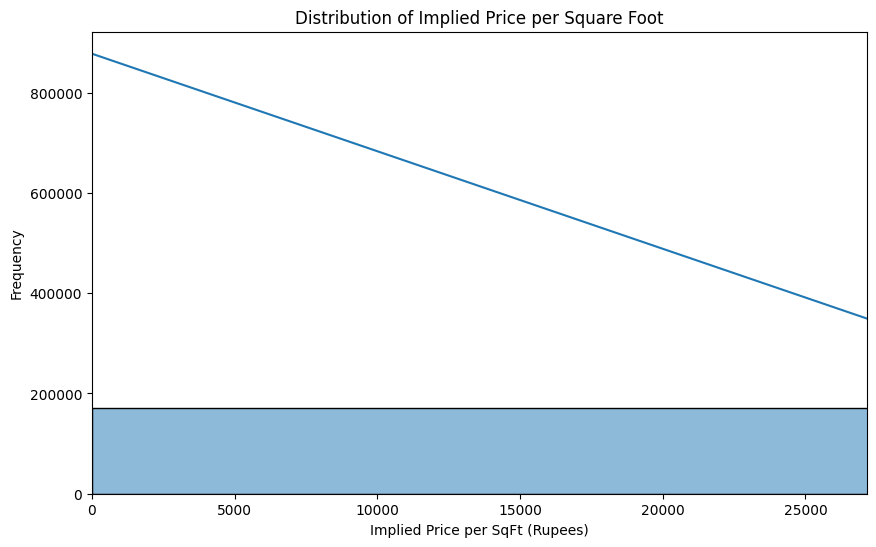

In [ ]:
#calculating missing amount in rupees with super area in sqft for which I have checked the rows where both are present in order to figure out
# Filter rows where both 'Amount(in Rupees)' and 'Super Area (sqft)' are present
price_and_super_area_present_df = df_cleaned[(df_cleaned['Amount(in Rupees)'].notnull()) & (df_cleaned['Super Area (sqft)'].notnull())].copy()

# Calculate implied price per square foot
# Add a small epsilon to avoid division by zero if Super Area (sqft) could be 0
epsilon = 1e-6
price_and_super_area_present_df['Implied Price per SqFt'] = price_and_super_area_present_df['Amount(in Rupees)'] / (price_and_super_area_present_df['Super Area (sqft)'] + epsilon)

# Display descriptive statistics of the implied price per square foot
print("Descriptive Statistics for Implied Price per SqFt:")
display(price_and_super_area_present_df['Implied Price per SqFt'].describe())

# Visualize the distribution of the implied price per square foot
plt.figure(figsize=(10, 6))
sns.histplot(price_and_super_area_present_df['Implied Price per SqFt'], bins=50, kde=True)
plt.title('Distribution of Implied Price per Square Foot')
plt.xlabel('Implied Price per SqFt (Rupees)')
plt.ylabel('Frequency')
plt.xlim(0, price_and_super_area_present_df['Implied Price per SqFt'].quantile(0.99)) # Limit x-axis for better visualization
plt.show()

In [ ]:
# Calculate the median of the implied price per square foot
# The median is used because it is less sensitive to outliers compared to the mean,
# which is important given the skewed distribution of implied prices observed in the histogram.
median_implied_price_per_sqft = price_and_super_area_present_df['Implied Price per SqFt'].median()

# Fill null values in 'Price (in rupees)' with the calculated median implied price per square foot
# Using assignment instead of inplace=True to avoid FutureWarning and ensure future compatibility
df_cleaned['Price (in rupees)'] = df_cleaned['Price (in rupees)'].fillna(median_implied_price_per_sqft)

# Verify that the null values in 'Price (in rupees)' are filled by checking the sum of nulls
print("Null values in 'Price (in rupees)' after imputation:")
display(df_cleaned['Price (in rupees)'].isnull().sum())

Null values in 'Price (in rupees)' after imputation:


np.int64(0)

In [ ]:
df_cleaned

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,BHK (measure),Amount(in Rupees),Carpet Area Unit,Super Area Unit,Carpet Area (sqft),Super Area (sqft),CurrentFloor,TotalFloors,Floor ratio,Floor level
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,1,4200000.0,sqft,None,500.0,625.00,10.0,11.0,0.909091,High
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,2,9800000.0,sqft,None,473.0,591.25,3.0,22.0,0.136364,Low
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,2,14000000.0,sqft,None,779.0,973.75,10.0,29.0,0.344828,Mid
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,5999.999988,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,1,2500000.0,sqft,None,530.0,662.50,1.0,3.0,0.333333,Mid
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,2,16000000.0,sqft,None,635.0,793.75,20.0,42.0,0.476190,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.000000,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,3,6300000.0,None,sqft,1562.4,1953.00,2.0,4.0,0.500000,Mid
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.000000,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,3,5500000.0,None,sqft,1344.0,1680.00,4.0,6.0,0.666667,High
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.000000,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,3,7600000.0,sqft,None,1250.0,1562.50,1.0,3.0,0.333333,Mid
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.000000,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,2,3000000.0,None,sqft,567.2,709.00,2.0,2.0,1.000000,High


In [ ]:
#checking status and null values or unknown values in it
display(df_cleaned['Status'].unique())

array(['Ready to Move', nan], dtype=object)

In [ ]:
#replaced null values in status with 'Not Known'
df_cleaned['Status'].fillna('Not Known', inplace=True)

# Verify the changes by displaying the unique values again
print("Unique values in 'Status' after filling nulls:")
display(df_cleaned['Status'].unique())

# Check for null values in the 'Status' column
print("\nNull values in 'Status' after filling nulls:")
display(df_cleaned['Status'].isnull().sum())

Unique values in 'Status' after filling nulls:


/tmp/ipython-input-2954842069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Status'].fillna('Not Known', inplace=True)


array(['Ready to Move', 'Not Known'], dtype=object)


Null values in 'Status' after filling nulls:


np.int64(0)

In [ ]:
df_cleaned.isnull().sum()

,0
Index,0
Title,0
Description,1855
Amount(in rupees),0
Price (in rupees),0
location,0
Carpet Area,71445
Status,0
Floor,0
Transaction,59


In [ ]:
#checking unique values in transaction column
display(df_cleaned['Transaction'].unique())

array(['Resale', 'New Property', nan, 'Other', 'Rent/Lease'], dtype=object)

In [ ]:
# Replace nulls in 'Transaction' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['Transaction'] = df_cleaned['Transaction'].fillna('Not Known')

# Verify the changes by displaying the unique values again
print("Unique values in 'Transaction' after filling nulls:")
display(df_cleaned['Transaction'].unique())

# Check for null values in the 'Transaction' column
print("\nNull values in 'Transaction' after filling nulls:")
display(df_cleaned['Transaction'].isnull().sum())

Unique values in 'Transaction' after filling nulls:


array(['Resale', 'New Property', 'Not Known', 'Other', 'Rent/Lease'],
      dtype=object)


Null values in 'Transaction' after filling nulls:


np.int64(0)

In [ ]:
#checking unique values in bathroom. as observed there seem to be some null values
display(df_cleaned['Bathroom'].unique())

array(['1', '2', '3', '4', '6', nan, '5', '9', '8', '> 10', '7', '10'],
      dtype=object)

In [ ]:
# Replace nulls in 'Bathroom' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['Bathroom'] = df_cleaned['Bathroom'].fillna('Not Known')

# Verify the changes by displaying the unique values again
print("Unique values in 'Bathroom' after filling nulls:")
display(df_cleaned['Bathroom'].unique())

# Check for null values in the 'Bathroom' column
print("\nNull values in 'Bathroom' after filling nulls:")
display(df_cleaned['Bathroom'].isnull().sum())

Unique values in 'Bathroom' after filling nulls:


array(['1', '2', '3', '4', '6', 'Not Known', '5', '9', '8', '> 10', '7',
       '10'], dtype=object)


Null values in 'Bathroom' after filling nulls:


np.int64(0)

In [ ]:
#observing and exploring the car parking
display(df_cleaned['Car Parking'].unique())

array([nan, '1 Open', '1 Covered', '2 Covered', '66 Covered',
       '701 Covered', '3 Covered', '1 Covered,', '35 Open', '4 Open',
       '323 Covered', '11 Covered', '103 Open', '203 Covered', '2 Open',
       '180 Covered', '14 Open', '50 Open', '10 Covered', '15 Open',
       '5 Open', '4 Covered', '509 Covered,', '101 Covered', '4 Covered,',
       '6 Covered,', '3 Covered,', '123 Covered', '505 Covered',
       '402 Covered', '8 Covered', '6 Covered', '5 Covered', '2 Covered,',
       '103 Covered', '12 Covered,', '202 Open', '202 Covered',
       '20 Covered,', '503 Open', '401 Covered', '3 Open', '501 Covered',
       '10 Covered,', '147 Covered', '20 Covered', '310 Covered',
       '204 Covered', '313 Covered', '302 Covered', '442 Covered',
       '23 Covered', '201 Covered,', '8 Open', '112 Covered',
       '706 Covered', '107 Covered', '120 Covered', '250 Covered',
       '11 Open', '217 Covered', '12 Covered', '621 Covered',
       '309 Covered', '536 Covered', '601 Covered

In [ ]:
# Replace nulls in 'Car Parking' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['Car Parking'] = df_cleaned['Car Parking'].fillna('Not Known')

# Function to categorize parking type
def categorize_parking_type(parking_str):
    if isinstance(parking_str, str):
        parking_str_lower = parking_str.lower()
        has_open = 'open' in parking_str_lower
        has_covered = 'covered' in parking_str_lower

        if has_open and has_covered:
            return 'Both'
        elif has_open:
            return 'Open'
        elif has_covered:
            return 'Covered'
        elif parking_str == 'Not Known': # Keep 'Not Known' if it was the fill value
             return 'Not Known'
        else:
            return 'Other/Not Specified' # For strings that don't contain Open or Covered

    return 'Not Known' # Should not happen after fillna, but as a fallback

# Apply the categorization to the 'Car Parking' column
df_cleaned['Car Parking'] = df_cleaned['Car Parking'].apply(categorize_parking_type)


# Verify the changes by displaying the unique values again
print("Unique values in 'Car Parking' after categorization:")
display(df_cleaned['Car Parking'].unique())

# Check for null values in the 'Car Parking' column (should be 0 after fillna)
print("\nNull values in 'Car Parking' after categorization:")
display(df_cleaned['Car Parking'].isnull().sum())

Unique values in 'Car Parking' after categorization:


array(['Not Known', 'Open', 'Covered'], dtype=object)


Null values in 'Car Parking' after categorization:


np.int64(0)

In [ ]:
display(df_cleaned['Furnishing'].unique())

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

In [ ]:
# Replace nulls in 'Furnishing' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['Furnishing'] = df_cleaned['Furnishing'].fillna('Not Known')

# Verify the changes by displaying the unique values again
print("Unique values in 'Furnishing' after filling nulls:")
display(df_cleaned['Furnishing'].unique())

# Check for null values in the 'Furnishing' column
print("\nNull values in 'Furnishing' after filling nulls:")
display(df_cleaned['Furnishing'].isnull().sum())

Unique values in 'Furnishing' after filling nulls:


array(['Unfurnished', 'Semi-Furnished', 'Furnished', 'Not Known'],
      dtype=object)


Null values in 'Furnishing' after filling nulls:


np.int64(0)

In [ ]:
# Check unique values in 'facing'
print("Unique values in 'facing' before filling nulls:")
display(df_cleaned['facing'].unique())

# Fill null values in 'facing' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['facing'] = df_cleaned['facing'].fillna('Not Known')

# Verify the changes by displaying the unique values again
print("\nUnique values in 'facing' after filling nulls:")
display(df_cleaned['facing'].unique())

# Check for null values in the 'facing' column
print("\nNull values in 'facing' after filling nulls:")
display(df_cleaned['facing'].isnull().sum())

Unique values in 'facing' before filling nulls:


array([nan, 'East', 'West', 'North - East', 'North', 'North - West',
       'South', 'South -West', 'South - East'], dtype=object)


Unique values in 'facing' after filling nulls:


array(['Not Known', 'East', 'West', 'North - East', 'North',
       'North - West', 'South', 'South -West', 'South - East'],
      dtype=object)


Null values in 'facing' after filling nulls:


np.int64(0)

In [ ]:
display(df_cleaned['Balcony'].unique())

array(['2', nan, '1', '3', '4', '6', '5', '7', '> 10', '10', '8', '9'],
      dtype=object)

In [ ]:
# Replace nulls in 'Balcony' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['Balcony'] = df_cleaned['Balcony'].fillna('Not Known')

# Verify the changes by displaying the unique values again
print("Unique values in 'Balcony' after filling nulls:")
display(df_cleaned['Balcony'].unique())

# Check for null values in the 'Balcony' column
print("\nNull values in 'Balcony' after filling nulls:")
display(df_cleaned['Balcony'].isnull().sum())

Unique values in 'Balcony' after filling nulls:


array(['2', 'Not Known', '1', '3', '4', '6', '5', '7', '> 10', '10', '8',
       '9'], dtype=object)


Null values in 'Balcony' after filling nulls:


np.int64(0)

In [ ]:
df_cleaned.isnull().sum()

,0
Index,0
Title,0
Description,1855
Amount(in rupees),0
Price (in rupees),0
location,0
Carpet Area,71445
Status,0
Floor,0
Transaction,0


In [ ]:
#drop index, title, description, Amount (in rupees), carpet area, super area, units, floors
columns_to_drop = ['Index','Title', 'Description', 'Amount(in rupees)', 'Carpet Area', 'Super Area', 'Carpet Area Unit', 'Super Area Unit', 'Floor', 'Society', 'Dimensions', 'Plot Area', 'Title2']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the remaining columns and the shape of the dataframe to verify
print("Remaining columns after dropping:")
display(df_cleaned.columns)
print("\nShape after dropping columns:")
display(df_cleaned.shape)

Remaining columns after dropping:


Index(['Index', 'Price (in rupees)', 'location', 'Status', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Amount(in Lacs of rupees)', 'BHK',
       'BHK (measure)', 'Amount(in Rupees)', 'Carpet Area (sqft)',
       'Super Area (sqft)', 'CurrentFloor', 'TotalFloors', 'Floor ratio',
       'Floor level'],
      dtype='object')


Shape after dropping columns:


(170767, 22)

In [ ]:
display(df_cleaned.isnull().sum())

,0
Index,0
Price (in rupees),0
location,0
Status,0
Transaction,0
Furnishing,0
facing,0
overlooking,71416
Bathroom,0
Balcony,0


In [ ]:
print("Unique values in 'overlooking':")
display(df_cleaned['overlooking'].unique())

print("\nUnique values in 'Ownership':")
display(df_cleaned['Ownership'].unique())

Unique values in 'overlooking':


array([nan, 'Garden/Park', 'Garden/Park, Main Road', 'Main Road',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Pool, Main Road',
       'Garden/Park, Pool', 'Main Road, Garden/Park',
       'Main Road, Garden/Park, Pool', 'Pool, Garden/Park', 'Pool',
       'Garden/Park, Main Road, Pool', 'Pool, Main Road',
       'Main Road, Pool, Garden/Park', 'Pool, Main Road, Garden/Park',
       'Main Road, Not Available', 'Main Road, Pool',
       'Garden/Park, Not Available', 'Pool, Main Road, Not Available'],
      dtype=object)


Unique values in 'Ownership':


array([nan, 'Freehold', 'Co-operative Society', 'Power Of Attorney',
       'Leasehold'], dtype=object)

In [ ]:
# Replace nulls in 'overlooking' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['overlooking'] = df_cleaned['overlooking'].fillna('Not Known')

# Replace nulls in 'Ownership' with 'Not Known'
# Using assignment to avoid FutureWarning
df_cleaned['Ownership'] = df_cleaned['Ownership'].fillna('Not Known')

# Verify that the null values in both columns are filled
print("Null values in 'overlooking' after filling:")
display(df_cleaned['overlooking'].isnull().sum())

print("\nNull values in 'Ownership' after filling:")
display(df_cleaned['Ownership'].isnull().sum())

print("\nUnique values in 'overlooking' after filling:")
display(df_cleaned['overlooking'].unique())

print("\nUnique values in 'Ownership' after filling:")
display(df_cleaned['Ownership'].unique())

Null values in 'overlooking' after filling:


np.int64(0)


Null values in 'Ownership' after filling:


np.int64(0)


Unique values in 'overlooking' after filling:


array(['Not Known', 'Garden/Park', 'Garden/Park, Main Road', 'Main Road',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Pool, Main Road',
       'Garden/Park, Pool', 'Main Road, Garden/Park',
       'Main Road, Garden/Park, Pool', 'Pool, Garden/Park', 'Pool',
       'Garden/Park, Main Road, Pool', 'Pool, Main Road',
       'Main Road, Pool, Garden/Park', 'Pool, Main Road, Garden/Park',
       'Main Road, Not Available', 'Main Road, Pool',
       'Garden/Park, Not Available', 'Pool, Main Road, Not Available'],
      dtype=object)


Unique values in 'Ownership' after filling:


array(['Not Known', 'Freehold', 'Co-operative Society',
       'Power Of Attorney', 'Leasehold'], dtype=object)

In [ ]:
# Define the path to save the CSV file in your Colab Notebooks folder
csv_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_house_prices2.csv'

# Export the cleaned dataframe to a CSV file
df_cleaned.to_csv(csv_path, index=False)

print(f"Cleaned data exported to '{csv_path}'")

Cleaned data exported to '/content/drive/MyDrive/Colab Notebooks/cleaned_house_prices2.csv'
